<a href="https://colab.research.google.com/github/bc0403/acoustics/blob/main/ggzhang_05_%E5%90%84%E5%90%91%E5%90%8C%E6%80%A7%E6%9D%90%E6%96%99%E4%B8%AD%E7%9A%84SAW%E5%88%86%E6%9E%90_refactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## part 1, 符号计算

In [ ]:
import numpy as np
from sympy import (Matrix, symbols, Rational, init_printing, 
    eye, solve, exp, linsolve, diff, I)
init_printing(use_unicode=True)
import time

# DEFINE SYMBOLS
rho = symbols("rho")  # density
c11, c12, c13, c14, c33, c44 = symbols('c11 c12 c13 c14 c33 c44')  # stiffness
ex1, ex4, ex5, ey2, ez1, ez3 = symbols(
    'ex1 ex4 ex5, ey2, ez1, ez3')  # piezoelectric stress constants
eSxx, eSzz = symbols('eSxx eSzz')  # dielectric constants

alpha, beta, theta = symbols("alpha beta theta")  # Euler angles

x, y, z, t, k, b, v = symbols('x y z t k b v')
uxo1, uyo1, uzo1 = symbols('uxo1 uyo1 uzo1')  # null vector 1
uxo2, uyo2, uzo2 = symbols('uxo2 uyo2 uzo2')  # null vector 2
uxo3, uyo3, uzo3 = symbols('uxo3 uyo3 uzo3')  # null vector 3
b1, b2, b3 = symbols('b1 b2 b3')  # attenuation constant at z dirction
alpha1, alpha2, alpha3 = symbols('alpha1 alpha2 alpha3')  # linear combine coeff
Gamma = symbols('Gamma')  # Christoffel matrix

# wave propagation
Nab = Matrix([
    [1, 0, 0, 0, b, 0],
    [0, 0, 0, b, 0, 1],
    [0, 0, b, 0, 1, 0]
])

c = Matrix([
    [c11, c11-2*c44, c11-2*c44, 0, 0, 0],
    [c11-2*c44, c11, c11-2*c44, 0, 0, 0],
    [c11-2*c44, c11-2*c44, c11, 0, 0, 0],
    [0, 0, 0, c44, 0, 0],
    [0, 0, 0, 0, c44, 0],
    [0, 0, 0, 0, 0, c44]
])

Gamma = Nab*c*Nab.T
A = Gamma - eye(3)*rho*v**2
A

⎡   2                2                                                ⎤
⎢  b ⋅c₄₄ + c₁₁ - ρ⋅v              0           b⋅c₄₄ + b⋅(c₁₁ - 2⋅c₄₄)⎥
⎢                                                                     ⎥
⎢                          2                2                         ⎥
⎢           0             b ⋅c₄₄ + c₄₄ - ρ⋅v              0           ⎥
⎢                                                                     ⎥
⎢                                                 2                2  ⎥
⎣b⋅c₄₄ + b⋅(c₁₁ - 2⋅c₄₄)           0             b ⋅c₁₁ + c₄₄ - ρ⋅v   ⎦

In [ ]:
A13 = A
A13.col_del(1)
A13.row_del(1)
A13

⎡   2                2                           ⎤
⎢  b ⋅c₄₄ + c₁₁ - ρ⋅v     b⋅c₄₄ + b⋅(c₁₁ - 2⋅c₄₄)⎥
⎢                                                ⎥
⎢                            2                2  ⎥
⎣b⋅c₄₄ + b⋅(c₁₁ - 2⋅c₄₄)    b ⋅c₁₁ + c₄₄ - ρ⋅v   ⎦

In [ ]:
# ux1 = uxo1*exp(-I*k*b1*z)*exp(I*k*(v*t-x))
# uz1 = uzo1*exp(-I*k*b1*z)*exp(I*k*(v*t-x))

# ux3 = uxo3*exp(-I*k*b3*z)*exp(I*k*(v*t-x))
# uz3 = uzo3*exp(-I*k*b3*z)*exp(I*k*(v*t-x))

u1 = Matrix([
    [uxo1],
    [0],
    [uzo1]
])
u3 = Matrix([
    [uxo3],
    [0],
    [uzo3]
])
# u = alpha1*u1 + alpha3*u3

# T1 = -I*k*c*Nab.subs(b, b1).T*u1*alpha1
# T3 = -I*k*c*Nab.subs(b, b3).T*u3*alpha3
T1 = c*Nab.subs(b, b1).T*u1*alpha1
T3 = c*Nab.subs(b, b3).T*u3*alpha3
T = T1 + T3

T

⎡          α₁⋅(b₁⋅uzo₁⋅(c₁₁ - 2⋅c₄₄) + c₁₁⋅uxo₁) + α₃⋅(b₃⋅uzo₃⋅(c₁₁ - 2⋅c₄₄) +
⎢                                                                             
⎢α₁⋅(b₁⋅uzo₁⋅(c₁₁ - 2⋅c₄₄) + uxo₁⋅(c₁₁ - 2⋅c₄₄)) + α₃⋅(b₃⋅uzo₃⋅(c₁₁ - 2⋅c₄₄) +
⎢                                                                             
⎢          α₁⋅(b₁⋅c₁₁⋅uzo₁ + uxo₁⋅(c₁₁ - 2⋅c₄₄)) + α₃⋅(b₃⋅c₁₁⋅uzo₃ + uxo₃⋅(c₁₁
⎢                                                                             
⎢                                                0                            
⎢                                                                             
⎢                    α₁⋅(b₁⋅c₄₄⋅uxo₁ + c₄₄⋅uzo₁) + α₃⋅(b₃⋅c₄₄⋅uxo₃ + c₄₄⋅uzo₃)
⎢                                                                             
⎣                                                0                            

 c₁₁⋅uxo₃)          ⎤
                    ⎥
 uxo₃⋅(c₁₁ - 2⋅c₄₄))⎥
                    ⎥
 - 2⋅c₄₄))          ⎥
                    

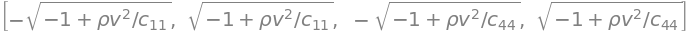

In [ ]:
b13 = solve(A13.det(), b)
b13

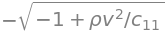

In [ ]:
b1s, _, b3s, _ = b13  # s means symbol
b1s


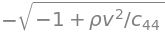

In [ ]:
b3s

In [ ]:
vec1 = A13.subs(b, b1s).nullspace()
vec3 = A13.subs(b, b3s).nullspace()
vec1

⎡⎡          ___________ ⎤⎤
⎢⎢         ╱         2  ⎥⎥
⎢⎢        ╱       ρ⋅v   ⎥⎥
⎢⎢-c₁₁⋅  ╱   -1 + ────  ⎥⎥
⎢⎢     ╲╱         c₁₁   ⎥⎥
⎢⎢──────────────────────⎥⎥
⎢⎢               2      ⎥⎥
⎢⎢     -c₁₁ + ρ⋅v       ⎥⎥
⎢⎢                      ⎥⎥
⎣⎣          1           ⎦⎦

In [ ]:
vec3

⎡⎡     ___________⎤⎤
⎢⎢    ╱         2 ⎥⎥
⎢⎢   ╱       ρ⋅v  ⎥⎥
⎢⎢  ╱   -1 + ──── ⎥⎥
⎢⎢╲╱         c₄₄  ⎥⎥
⎢⎢                ⎥⎥
⎣⎣       1        ⎦⎦

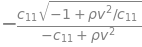

In [ ]:
uxo1s = vec1[0][0]
uzo1s = vec1[0][1]
uxo3s = vec3[0][0]
uzo3s = vec3[0][1]
uxo1s

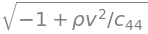

In [ ]:
uxo3s

In [ ]:
uzo1s

In [ ]:
uzo3s

## part 2， 数值计算：直接求解声速

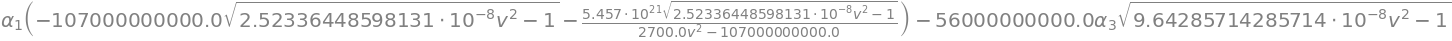

In [ ]:
Tzz = T[2].subs([(b1, b1s), (b3, b3s), (uxo1, uxo1s), (uzo1, uzo1s), (uxo3, uxo3s), (uzo3, uzo3s), (rho, 2700.0), (c11, 107.0e9), (c44, 28.0e9)])
Tzz

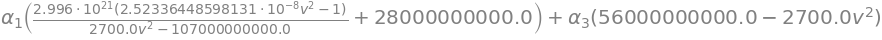

In [ ]:
Txz = T[4].subs([(b1, b1s), (b3, b3s), (uxo1, uxo1s), (uzo1, uzo1s), (uxo3, uxo3s), (uzo3, uzo3s), (rho, 2700.0), (c11, 107.0e9), (c44, 28.0e9)])
Txz

In [ ]:
B = Matrix([
    [diff(Tzz, alpha1), diff(Tzz, alpha3)],
    [diff(Txz, alpha1), diff(Txz, alpha3)]
])
B

⎡                                                                _____________
⎢                    ____________________________               ╱             
⎢                   ╱                      2        5.457e+21⋅╲╱  2.5233644859
⎢- 107000000000.0⋅╲╱  2.52336448598131e-8⋅v  - 1  - ──────────────────────────
⎢                                                                   2         
⎢                                                           2700.0⋅v  - 107000
⎢                                                                             
⎢                             ⎛                     2    ⎞                    
⎢                   2.996e+21⋅⎝2.52336448598131e-8⋅v  - 1⎠                    
⎢                   ────────────────────────────────────── + 28000000000.0    
⎢                                 2                                           
⎣                         2700.0⋅v  - 107000000000.0                          

_______________                                    

In [ ]:
start_time = time.time()
v_list = solve(B.det(), v)
end_time = time.time()
time_passed = end_time - start_time
v_list

In [ ]:
print(f"time escaped：{time_passed:.3f} s")

time escaped：95.035 s


In [ ]:
v_num = v_list[3]
v_num

In [ ]:
Tzz_num = Tzz.subs(v, v_num)
Txz_num = Txz.subs(v, v_num)
Tzz_num

In [ ]:
Txz_num

In [ ]:
solve(Tzz_num, alpha1)

In [ ]:
solve(Txz_num, alpha1)

In [ ]:
b1_num = b1s.subs([(v, v_num), (rho, 2700.0), (c11, 107.0e9), (c44, 28.0e9)])
b1_num

In [ ]:
b3_num = b3s.subs([(v, v_num), (rho, 2700.0), (c11, 107.0e9), (c44, 28.0e9)])
b3_num

In [ ]:
uxo1_num = uxo1s.subs([(v, v_num), (rho, 2700.0), (c11, 107.0e9), (c44, 28.0e9)])
uxo1_num

In [ ]:
uxo3_num = uxo3s.subs([(v, v_num), (rho, 2700.0), (c11, 107.0e9), (c44, 28.0e9)])
uxo3_num

In [ ]:
# ux1 = uxo1*exp(-I*k*b1*z)*exp(I*k*(v*t-x))
# uz1 = uzo1*exp(-I*k*b1*z)*exp(I*k*(v*t-x))

# ux3 = uxo3*exp(-I*k*b3*z)*exp(I*k*(v*t-x))
# uz3 = uzo3*exp(-I*k*b3*z)*exp(I*k*(v*t-x))

ux = (-(0.566686759781425)*uxo1_num*exp(-I*2*np.pi*b1_num*z) + uxo3_num*exp(-I*2*np.pi*b3_num*z))/(-I)  # z, scaled by wavelength
ux

In [ ]:
uz = (-(0.566686759781425)*1*exp(-I*2*np.pi*b1_num*z) + 1*exp(-I*2*np.pi*b3_num*z))
uz

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


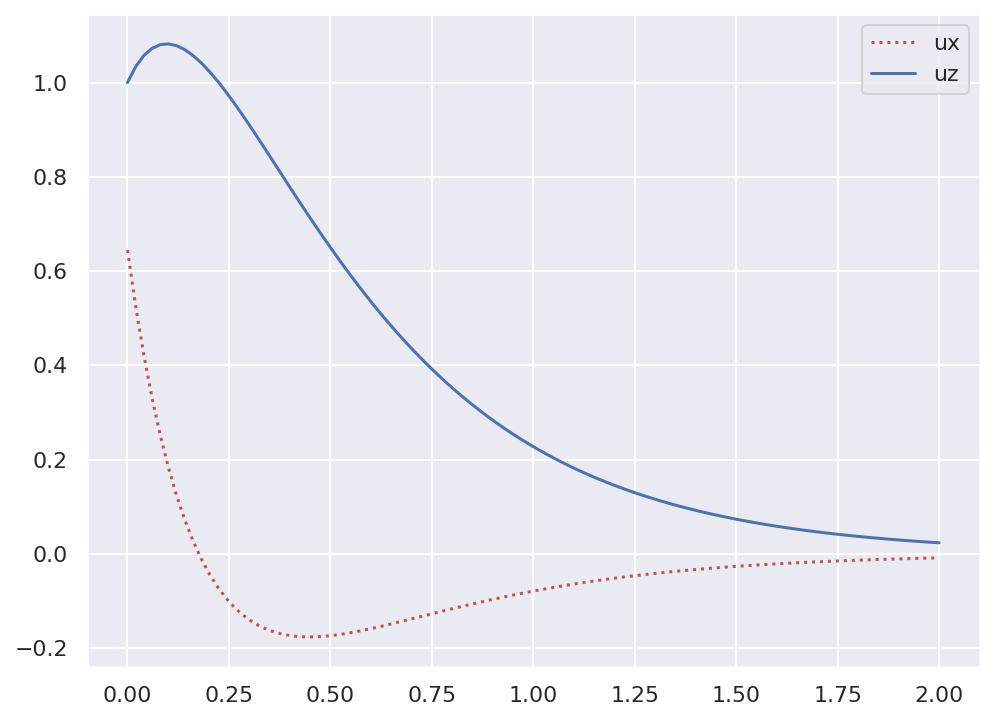

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sympy import lambdify
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(8, 6))

a = np.linspace(0, 2, 100)
fx = lambdify(z, ux, "numpy")
fz = lambdify(z, uz, "numpy")

ax.plot(a, fx(a)/fz(0), ':r', label='ux')
ax.plot(a, fz(a)/fz(0), 'b', label='uz')
ax.legend()


## part 3, 数值计算，迭代求解声速

In [ ]:
B

⎡                                                                _____________
⎢                    ____________________________               ╱             
⎢                   ╱                      2        5.457e+21⋅╲╱  2.5233644859
⎢- 107000000000.0⋅╲╱  2.52336448598131e-8⋅v  - 1  - ──────────────────────────
⎢                                                                   2         
⎢                                                           2700.0⋅v  - 107000
⎢                                                                             
⎢                             ⎛                     2    ⎞                    
⎢                   2.996e+21⋅⎝2.52336448598131e-8⋅v  - 1⎠                    
⎢                   ────────────────────────────────────── + 28000000000.0    
⎢                                 2                                           
⎣                         2700.0⋅v  - 107000000000.0                          

_______________                                    

In [ ]:
# loss1 = lambdify(v, abs(B.det()), "math")
# loss1 = abs(B.subs(v, v_num).det())
v_pred = 3000  # 声速初始值，该值需大于实际声速，因表面波声速低于切向体波声速，故可用切向体波的声速作为初始值
det_pred = B.det().evalf(subs={v:v_pred})
v_list = [v_pred]
det_list = [det_pred]
learn_rate = 1  # 初始step，每次减1
iters = 5 # 重复次数，当上一行初始step为1时，iters-1 即为声速的小数点位数

start_time = time.time()
for i in range(iters):    
    print(f"start guess with step {learn_rate}")
    for j in range(1000):
        if i%2 == 0:  # 往复寻找 
            v_pred -= learn_rate
        else:
            v_pred += learn_rate
        loss = B.det().evalf(subs={v:v_pred})
        print(f"guess {j+1}: at {v_pred}, det equalas to {loss}")
        det_list.append(loss)
        v_list.append(v_pred)
        if abs(det_list[-1])>abs(det_list[-2]):
            learn_rate *= 0.1
            break
end_time = time.time()
print("======")
print(f"the velocity is {v_list[-2]:.4f} m/s")  # iters-1 
print(f"time escaped: {end_time-start_time:.3f} s")


start guess with step 1
guess 1: at 2999, det equalas to -1.61216984213519e+18*I
guess 2: at 2998, det equalas to -1.82319116040611e+17*I
guess 3: at 2997, det equalas to 1.24127005147289e+18*I
start guess with step 0.1
guess 1: at 2997.1, det equalas to 1.09919174158462e+18*I
guess 2: at 2997.2, det equalas to 9.57051182920175e+17*I
guess 3: at 2997.2999999999997, det equalas to 8.14848334943681e+17*I
guess 4: at 2997.3999999999996, det equalas to 6.72583157074596e+17*I
guess 5: at 2997.4999999999995, det equalas to 5.30255608687649e+17*I
guess 6: at 2997.5999999999995, det equalas to 3.87865649112772e+17*I
guess 7: at 2997.6999999999994, det equalas to 2.45413237635028e+17*I
guess 8: at 2997.7999999999993, det equalas to 1.02898333494537e+17*I
guess 9: at 2997.899999999999, det equalas to -3.96791041135868e+16*I
guess 10: at 2997.999999999999, det equalas to -1.82319116039313e+17*I
start guess with step 0.010000000000000002
guess 1: at 2997.989999999999, det equalas to -1.68052297836